# Gross-Pitaevskii equation with magnetism

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.115494e+01     8.508019e+00
 * time: 0.0018169879913330078
     1     2.940536e+01     4.647005e+00
 * time: 0.00751495361328125
     2     1.903227e+01     3.632797e+00
 * time: 0.014336109161376953
     3     1.343988e+01     2.852464e+00
 * time: 0.021086931228637695
     4     1.179569e+01     3.545607e+00
 * time: 0.026658058166503906
     5     1.098305e+01     2.142541e+00
 * time: 0.03233599662780762
     6     9.944893e+00     1.360298e+00
 * time: 0.037893056869506836
     7     9.116886e+00     1.139807e+00
 * time: 0.043478965759277344
     8     8.710517e+00     6.980590e-01
 * time: 0.049089908599853516
     9     8.574539e+00     6.514337e-01
 * time: 0.05460095405578613
    10     8.508338e+00     7.690265e-01
 * time: 0.05904507637023926
    11     8.466057e+00     9.086659e-01
 * time: 0.0634920597076416
    12     8.379557e+00     4.566678e-01
 * time: 0.06908392906188965
    13     8.303231e+00     8.326025e-01
 

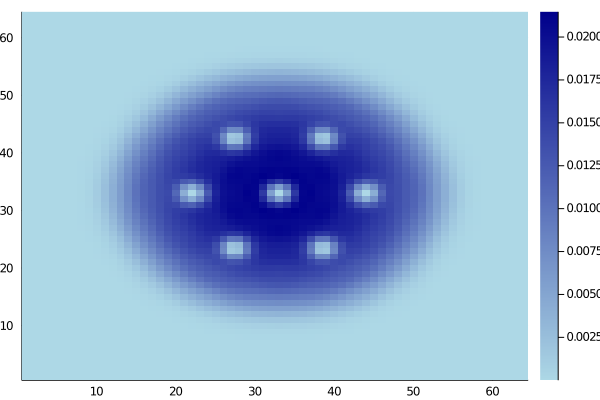

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         PowerNonlinearity(C, α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model, Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ.real[:, :, 1], c=:blues)